# Dynamic Programming and Structural Econometrics #13

### Time iterations and the Endogenous gridpoint method (EGM)

**Readings:** 
📖 Carroll (2006) Original article on EGM
  [link](http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf)
  
by Bertel Schjerning

University of Copenhagen



### This lecture
1. The Euler Equation 
1. Time iterations
1. Endogenous gridpoint method (EGM)


### The Euler Equation 


### First order conditions in dynamic models with continuous choice
The bellman equation for the **infinite horizon**, $T = \infty$ 
$$
V(s)=  \max_{d \in D(s)} \big[u(s, d) + \beta \int V(s')p(ds'|s, d)  \big]
$$ 

We can write FOCs for the maximization problem in Bellman equation! Is there any use?

- must be satisfied with optimal policy $ \Rightarrow $ solution method ideas
  - backwards induction with equation solving instead of optimization
  - time iterations in the infinite horizon problems  
- unless constraints are binding, FOC must be satisfied even when using some other method $ \Rightarrow $ ideas of checking accuracy of numerical solutions
  - Euler residuals accuracy check
  - flat consumption path must be simulated with certain restrictions on parameters (Keane test)
  - other known theoretical property of the solution must hold  

### Example: Consumption-savings problem (Deatons model)

$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$

- discrete time, infinite horizon  
- one continuous choice of consumption $ 0 \le c \le M $  
- state space: consumable resources in the beginning of the period $ M $, discretized  
- income $ \tilde{y} $, follows log-normal distribution with $ \mu = 0 $ and $ \sigma $  

### First order conditions for Deatons model

$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$

FOC:

$$
u'(c^\star) - \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big) = 0
$$

- define implicit function $ c^\star(M) $ — *policy function*  
- but $ V'(\cdot) $ requires special provisions in the numerical implementation..  

### Envelope theorem

$$
\text{Let } G(M,c)=u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)
$$

so that the policy function $ c^\star(M) $ satisfies $ V(M)=G(M,c^\star(M)) $. Then

$$
V'(M) = \tfrac{\partial G(M,c^\star)}{\partial M} + \underset{=0\text{ by FOC}}{\underbrace{\tfrac{\partial G(M,c^\star)}{\partial c^\star}}} \tfrac{\partial c^\star(M)}{\partial M}
= \tfrac{\partial G(M,c^\star)}{\partial M} = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big)
$$

### Euler equation for Deatons model

$$
\text{(FOC)  } u'(c^\star) = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big)
$$

$$
\text{(envelope theorem)  } V'(M) = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big)
$$

Thus, we have $ u'(c^\star) = V'(M) $ in every period, and thus

$$
u'\big(c^\star(M)\big) = \beta R \mathbb{E}_{y} u'\big(c^\star\big(\underset{=M'}{\underbrace{R[M-c^\star(M)]+\tilde{y}}}\big)\big)
$$

### Perfect consumption smoothing

In deterministic model where $ \tilde{y} $ is fixed, if $ \beta R = 1 $ we have in every two consecutive periods

$$
u'\big(c^\star(M)\big) = u'\big(c^\star(M')\big) \Rightarrow
c^\star(M) = c^\star(M')
$$

*Perfect consumption smoothing!*

This is one of the tests for the correct solution of the consumption-savings model!

### Accuracy measure using Euler equation

Common in the literature is to use the average squared **Euler residuals** on a dense
grid with $ K $ points as a measure of accuracy of the solution for Deatons model

$$
ER\big( c(M) \big) = u'\big(c(M)\big) - \beta R \mathbb{E}_{y} u'\big(c\big(R[M-c(M)]+\tilde{y}\big)\big)
$$

$$
Q \big( c(M) \big) = \frac{1}{K} \sum_{k=1}^{K} {ER}^2\big( c(M_k) \big)
$$

The closer $ Q\big( c(M) \big) $ is to zero, the better the solution

- Note however, that the Euler residuals will only be zero when constraints are not binding - unless we add the shadow-price of the constraint 

### Time iterations

The idea of this solution method is to solve the Euler equation in the space of
policy functions $ c(M) \in \mathcal{P} $ as a *functional equation*

$$
u'\big(c(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c(M))+\tilde{y}]\big)
$$

The solution is given by the **fixed point** of the *Coleman-Reffett operator* $ K(c)(M) $

- takes as input policy function $ c(M) \in \mathcal{P} $  
- returns the updated policy function $ c'(M) \in \mathcal{P} $ that for every $ M $ satisfies  


$$
u'\big(c'(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c'(M))+\tilde{y}]\big) \quad \text{if} \quad 0<c'(M)<M
$$

### Contraction mapping?

Is Coleman-Reffett operator a contraction mapping? **Yes** (in the reasonable metric space with a specially defined norm)

📖 Huiyu Li, John Stachurski (2014, *Journal of Economic Dynamics and Control*) “Solving the income fluctuation problem with unbounded rewards”

- Existence and uniqueness of the solution!  
- Successive approximations solver will deliver the solution  
- Globally convergent  

### Time iteration algorithm

1. Discretize the state space  
1. Set the initial policy $ c_0(M) $ at state grid  
1. Increment iteration counter $ i $ (initialize to 0)  
1. Solve Euler equation in every point of the the grid, i.e. plug $ c_{i-1}(M) $ to the
  RHS of the Euler equation, and solve for the $ c $ in the LHS, it becomes new $ c_i(M) $. 
constrained is imposed so that c=M
1. Check for convergence in policy function space:  
  - If converged, output $ c_i(M) $  
  - Otherwise, return to step 3.  
  
Note that in step 4 we need to check if FOC is sufficient. If Euler residual is positive for c=M (i.e. consumer would like consume more today that available), we are in a corner solution and impose the constraint. 

#### Accuracy and speed

How does time iteration solver compares to VFI (with explicit maximization)?

- theoretical complexity and convergence rates are the same  
- policy functions are easier to interpolate (less curvature), so interpolation errors are smaller  
- therefore time iterations usually converge faster  
- for the same reasons time iterations deliver more accurate solution  


Will do some experiments below

### Need some libraries

In [1]:
%clear
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy import interpolate # Interpolation routines
from scipy.optimize import minimize_scalar, brentq

### Initialize Deaton class (will add bellman operator and Coleman-Reffett operator later)

In [2]:
class deaton():
    '''Class to implement deaton's model with log-normally distrubuted income shocks'''
    def __init__(self,
                 β=.9,         # Discount factor
                 R=1,          # Returns on savings
                 μ=0,          # Location parameter for income shock, y (if y is log normal, ln(y) ~ N(μ, σ^2))  
                 σ=1,          # Scale parameter for income shock, y
                 η=1,          # CRRA utility parameter, (η=0: linear, η=1: log, η>1: more risk averse than log
                 xbar=[0, 10], # Upper and lower bound on cash on hand
                 n_x=50,       # Number of grid points for cash on hand
                 n_y=10,       # Number of quadrature points (for income)
                 maxiter_c=100, tol_c=0.0001 # techincal parameters
                 ):
        '''Initializer'''
        
        for arg in ('β', 'R', 'μ', 'σ', 'η', 'xbar', 'n_x', 'n_y', 'maxiter_c', 'tol_c'): 
            setattr(self, arg, eval(arg))
        
        # grids for x
        self.xbar[0] = np.maximum(1e-10, self.xbar[0]);  # truncate lower bound at smallest positive float number
        self.x = np.linspace(self.xbar[0],self.xbar[1],n_x).reshape((n_x,1)) # grid for state space (n_w x 1 array)

        # quadrture grids for y (adjusted weights and nodes)
        q, w = np.polynomial.legendre.leggauss(n_y) # legendre quadrture nodes and weights on [-1,1]
        Ginv = lambda z:  np.exp(scipy.stats.norm.ppf(z, loc=self.μ, scale =self.σ))  # inverse cdf of log-normal
        self.weights=w/2; # change of varibale to adjust to [0,1] interval
        self.y = Ginv((q+1)/2) # use change of variable to adjust nodes to [0,1] interval and use Ginv to obntain y
        
    def next_period_x(self,x,c,y):   # vector of next period wealth
        # assume that c and M are either scalars or 1-dim arrays of the same size        
        return self.R*(x-c) + y  # vector of next period wealth
        
    def utility(self,c): # utility function
        '''CRRA utility function'''
        if self.η==1:
            return np.log(c)
        elif self.η>=0:
            return (c**(1-self.η) -1)/(1-self.η)
    
    def marginal_utility(self,c): # marginal utility function
        '''Returns marginal utility (mu) given consumption, c - assumes crra utility function '''
        return c**(-self.η)

    def inv_marginal_utility(self,mu): # inverse marginal utility function 
        '''Returns c, given inverse marginal utility (mu) - assumes crra utility function'''
        return mu**(-1/self.η)

### The Bellman equation
$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$


In [3]:
class deaton(deaton):
    def bellman_V(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on state grid'''
        interp_V = interpolate.interp1d(self.x[:,0],V0,  bounds_error=False,fill_value='extrapolate')
        
        def neg_vc(c, x): # (netaive of) choice specific value function (evalauted at x and c)
            x1= self.next_period_x(x,c,self.y)
            vc= self.utility(c)  + self.β * np.sum(self.weights*interp_V(x1))
            return -vc
        
        V=np.empty(self.n_x,dtype='float')    # allocate space for the policy function
        c=np.empty(self.n_x,dtype='float')    # allocate space for the value function        
        opt = {'maxiter':self.maxiter_c, 'xatol':self.tol_c} # options for optimzier
        for i, x_i in enumerate(self.x): # loop over state space
            res = minimize_scalar(neg_vc,args=x_i, method='Bounded',bounds=[self.x[0],x_i],options=opt) # result from minimize_scalar
            c[i] = res.x # optimal consumption in state x[i]
            V[i] = -neg_vc(c[i], x_i) # value function in state x[i], don't forget the negation!
        return V, c

### VFI

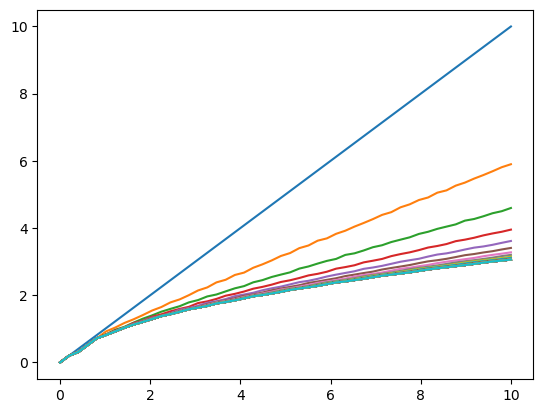

In [4]:
## import matplotlib.pyplot as plt
m1=deaton()
V0=m1.x[:,0]*0
for i in range(50):
    V0, c = m1.bellman_V(V0)
    plt.plot(m1.x,c)
plt.show()

### The Euler Residual
$$
ER\big( c(M) \big) = u'\big(c(M)\big) - \beta R \mathbb{E}_{y} u'\big(c\big(R[M-c(M)]+\tilde{y}\big)\big)
$$


In [5]:
class deaton(deaton):    
    def euler_residual(self,c,x,interp_c):
        '''Computes the Euler residuals for a given points (x,c), and
           given interpolated consumption policy function, interp_c, that enters into the RHS of Euler equation
           Argument interp_c is interpolation function for the policy
        '''
    
        # RHS of Euler equation: discounted future expected marginal utility implied bny comsuming c in state x
        x1=self.next_period_x(x,c,self.y)       
        c1=np.maximum(1e-1,interp_c(x1))
        RHS = self.β*self.R*np.sum(self.weights*self.marginal_utility(c1))

        # LHS of Euler equation: marginal utility of consumption, c
        LHS = self.marginal_utility(c)
        return LHS-RHS

### The Euler residual for VFI solution

/var/folders/4v/hgsy2rz929s624tqhtjjsj2r0000gn/T/ipykernel_64336/2005213247.py:42: RuntimeWarning: invalid value encountered in reciprocal
  return c**(-self.η)


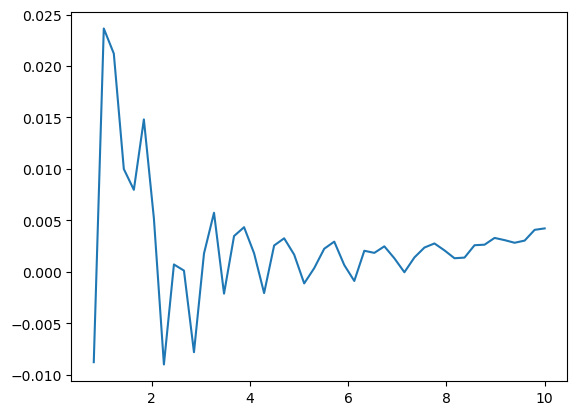

In [6]:
m1=deaton()
interp_c0 = interpolate.interp1d(m1.x[:,0],c,  bounds_error=False,fill_value='extrapolate')
err=np.empty(m1.n_x,dtype='float') 
for i,x_i in enumerate(m1.x):
    if c[i]<x_i:
        err[i]=m1.euler_residual(c[i],x_i,interp_c0)
plt.plot(m1.x[4:,0],err[4:])
plt.show()

### The Coleman-Reffet operator, $K(c)(M)$

In [7]:
class deaton(deaton):    
    def euler_iter(self, c0):
        '''Coleman-Reffet operator '''
        c = np.empty(self.n_x,dtype=float)  # allocate space for polity and value functions
        # interpolation function for policy c0
        interp_c0 = interpolate.interp1d(self.x[:,0],c0,  bounds_error=False,fill_value='extrapolate') 

        for i,x_i in enumerate(self.x):
            if x_i<=self.x[0] or self.euler_residual(c=x_i,x=x_i,interp_c=interp_c0)>0:
                c[i] = x_i  # corner solution
            else:  # first order optimality for consumption for given x_i
                c[i] = brentq(self.euler_residual,args=(x_i,interp_c0),a=self.x[0],b=x_i,
                               xtol=self.tol_c,maxiter=self.maxiter_c, full_output=False,disp=True) 
        return c

### Time iterations

/var/folders/4v/hgsy2rz929s624tqhtjjsj2r0000gn/T/ipykernel_64336/2005213247.py:42: RuntimeWarning: invalid value encountered in reciprocal
  return c**(-self.η)


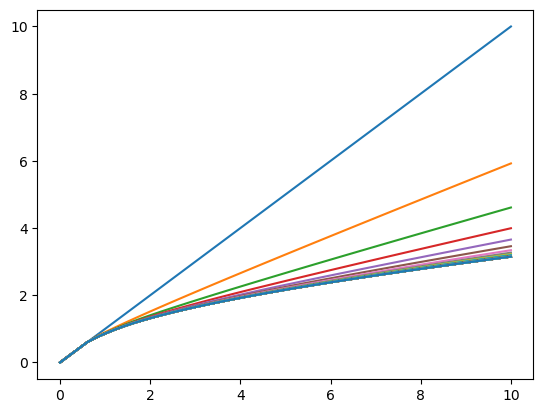

In [8]:
m1=deaton()  # create model instance
c = m1.x[:,0] # on first iteration assume consuming everything
plt.plot(m1.x,c)
for i in range(50):
    c = m1.euler_iter(c)
    plt.plot(m1.x,c)
plt.show()

### The Euler residual for solution obtained by time iterations

/var/folders/4v/hgsy2rz929s624tqhtjjsj2r0000gn/T/ipykernel_64336/2005213247.py:42: RuntimeWarning: invalid value encountered in reciprocal
  return c**(-self.η)


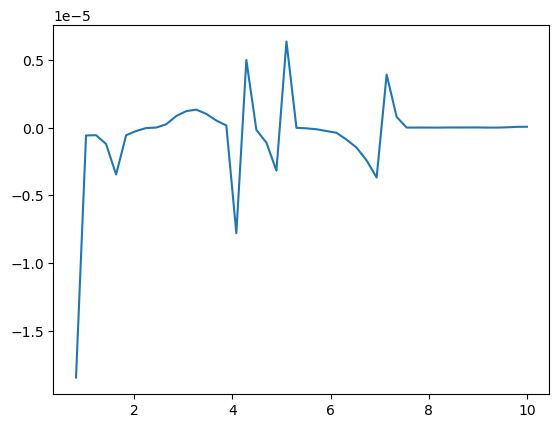

In [9]:
interp_c0 = interpolate.interp1d(m1.x[:,0],c,  bounds_error=False,fill_value='extrapolate')
err=np.empty(m1.n_x,dtype='float') 
for i,x_i in enumerate(m1.x):
    if c[i]<x_i:
        err[i]=m1.euler_residual(c[i],x_i,interp_c0)
plt.plot(m1.x[4:,0],err[4:])
plt.show()

### Further learning resources

- Derivation of Euler equation in cake eating model [https://python.quantecon.org/cake_eating_problem.html](https://python.quantecon.org/cake_eating_problem.html)  
- Time iterations on QuantEcon [https://python.quantecon.org/coleman_policy_iter.html](https://python.quantecon.org/coleman_policy_iter.html)  

### Endogenous gridpoint method (EGM)

### Endogenous gridpoint method (EGM)

- *fastest and most accurate* solution methods for *particular* problems with continuous choice  
- finite and infinite horizon, discrete time  
- best way to solve stochastic consumption-savings problem  
- applicable to many other important problems  
- has multiple generalizations which are applicable to a larger class of problems  

#### EGM is like magic

Most accurate solution method for consumption-savings problem we have so far?

- VFI with continuous choices = repeatedly solving optimization problem *in every point in the state space*  
- time iterations = repeatedly solving F.O.C. in the Bellman maximization problem *in every point in the state space*  


EGM on the other hand: **no root-finding operations!**

- but .. only applies to a certain class of problems  
- hard to grasp right away, best studied by example  

#### Consumption-savings problem (Deaton model)

$$
V(M)=\max_{0 \le c \le M}\big\{u(c)+\beta \mathbb{E}_{y} V\big(\underset{=M'}{\underbrace{R(M-c)+\tilde{y}}}\big)\big\}
$$

- discrete time, infinite horizon  
- one continuous choice of consumption $ 0 \le c \le M $  
- state space: consumable resources in the beginning of the period $ M $, discretized  
- income $ \tilde{y} $, follows log-normal distribution with $ \mu = 0 $ and $ \sigma $  

#### Euler equation for Deaton model

FOC: $ \quad u'(c^\star) - \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big) = 0 $

Envelope theorem: $ \quad V'(M) = \beta R \mathbb{E}_{y} V'\big(R(M-c^\star)+\tilde{y}\big) $

**Euler equation**:

$$
u'\big(c^\star(M)\big) = \beta R \mathbb{E}_{y} u'\big(c^\star\big(\underset{=M'}{\underbrace{R[M-c^\star(M)]+\tilde{y}}}\big)\big)
$$

(see video 39)

#### New variable needed for EGM

Let $ A $ denote **end-of-period** wealth = wealth after consumption (savings)

Timing of the model:

$$
M \rightarrow c(M) \rightarrow A = M-c(M) \rightarrow M' = R(M-c(M)) + \tilde{y} = RA + \tilde{y}
$$

$$
0 \le c \le M \; \Rightarrow \; 0 \le A = M-c \le M
$$

- $ A $ contains all the information needed for the calculation of the expected value function in the next period, “sufficient statistic” for the current period state and choice  
- $ A $ is often referred to as *post-decision state*  

#### Euler equation with post-decision state

$$
u'\big(c(M)\big) = \beta R \mathbb{E}_{y} u'\big(c(RA+\tilde{y})\big)
$$

- if policy function $ c(M) $ is optimal, then it satisfies the above equation with $ A = M-c(M) $  
- given any policy function $ c(M) $, an updated policy function $ c'(M') $ is given as a *parameterized curve*  


$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
M' = A + c'
\end{cases}
$$

- where parameter $ A $ ranges over the interval $ (0,M) $  

#### Coleman-Reffett operator

*Coleman-Reffett operator* $ K(c)(M) : \mathcal{P} \rightarrow \mathcal{P} $

- takes as input policy function $ c(M) \in \mathcal{P} $  
- returns the updated policy function $ c'(M) \in \mathcal{P} $ that for every $ M $ satisfies  


$$
u'\big(c'(M)\big) = \beta R \mathbb{E}_{y} u'\big(c[R(M-c'(M))+\tilde{y}]\big)
$$

Standard implementation:

1. Fix grid over $ M $  
1. With given $ c(M) $ solve the equation for $ c $ in each point $ M $ on the grid  

#### EGM implementation of Coleman-Reffett operator

1. Fix grid over $ A $  
1. With given $ c(M) $ for each point on the grid compute  


$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c\big(RA+\tilde{y})\big) \Big) \\
M' = A + c'
\end{cases}
$$

1. Build the returned policy function $ c'(M) $ as interpolation over computed points $ (M',c') $  


*EGM is time iterations solver with a much more efficient implementation of Coleman-Reffett operator*

#### EGM algorithm

1. Set a grid on (discretize) post-decision state $ A $ instead of state $ M $  
1. Set the initial policy $ c_0(M) = M $ defined over two points $ M \in \{0,\bar{M}\} $  
1. Increment iteration counter $ i $ (initialized to 0)  
1. For each point $ A_j $ on the grid over $ A $ perform the **EGM step** and return the corresponding value of
  consumption $ c_j $ and the endogenous point of wealth $ M_j = A_j+c_j $  
1. Combine all computed endogenous points in the state space $ M_j $, and their corresponding consumption levels $ c_j $ to build the
  updated policy function $ c_i(M) $  
1. Return to step 3, unless convergence achieved (policy functions $ c_i(M) $ and $ c_{i-1}(M) $ are within given tolerance)  

#### EGM algorithm (EGM step)

Given point $ A_j $ on the grid over $ A $:
1. Compute the next period wealth $ M'_j = RA_j + \tilde{y} $, replacing $ \tilde{y} $ with quadrature points
2. Compute the optimal consumption in the next period in all quadrature points, using the previous iteration policy function $ c_{i-1}(\cdot) $
3. Compute the marginal utility for each value of consumption, and complete the calculation of the expectation in RHS of Euler equation
4. Using inverse marginal utility function, compute optimal consumption $ c_j $ in current period, corresponding to the point $ A_j $
5. complete the EGM step by computing endogenous state point $ M_j = A_j + c_j $

#### Properties of EGM algorithm

- successive approximations in the policy function space  
- same structure as time iterations, with new implementation of Coleman-Reffett operator  
- the updating of policy function is done with the EGM step  
- **no root-finding operations**, direct computation instead $ \rightarrow $ **fast**  
- Euler equation holds in the generated endogenous state points $ \rightarrow $ **accurate**  

#### EGM principle

- Instead of finding the optimal decision in each point of a fixed grid over the state space ..  
- find the point in the state space where a “guessed” decision would be optimal.  

#### Example using deterministic consumption-savings model

$$
V(M)=\max_{0 \le c \le M}\big\{log(c)+\beta V\big(R(M-c)+y\big)\big\}
$$

$$
u'\big(c^\star(M)\big) = \beta R u'\big(c^\star\big(R[M-c^\star(M)]+y\big)\big)
$$

$$
\begin{cases}
c' = (u')^{-1} \Big( \beta R u'(c\big(RA+y)\big) \Big) \\
M' = A + c
\end{cases}
$$

###  Clear notebook memory and import

In [10]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline


### Set up plotting tool

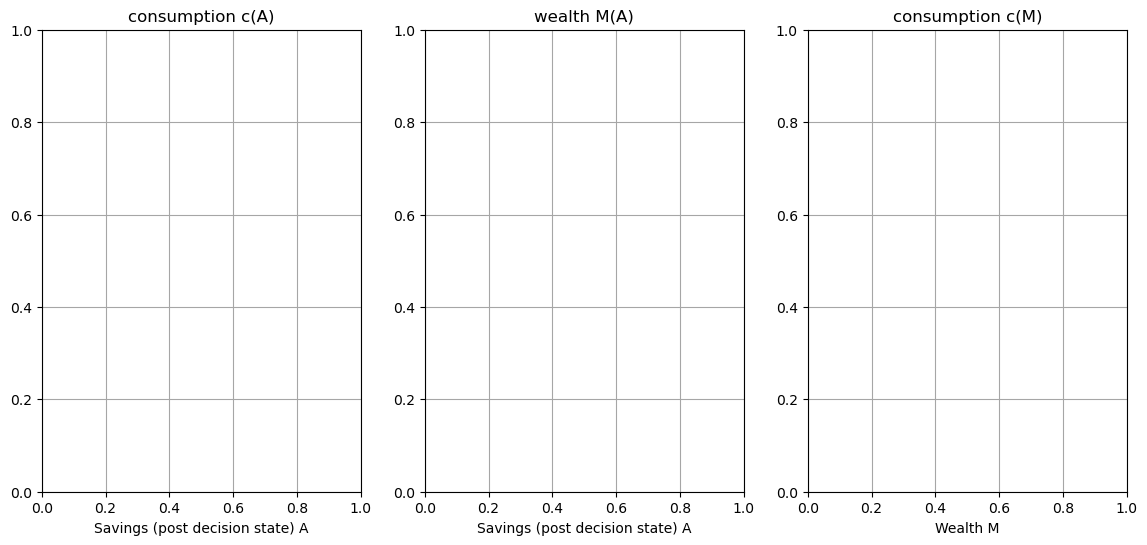

In [11]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Set up grids and parameters and plot

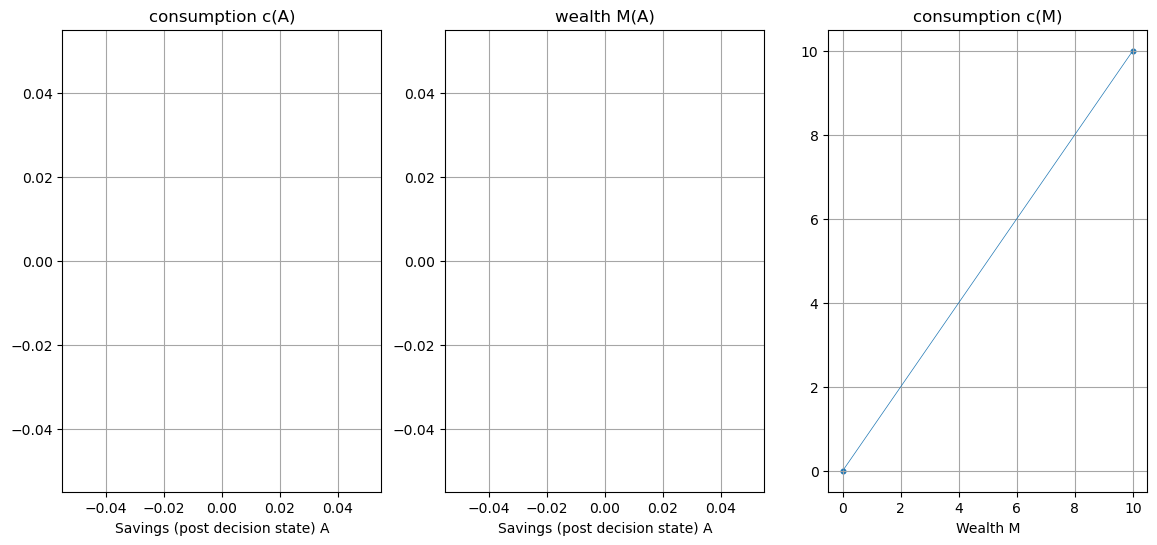

In [12]:
beta,R,y = 0.95,1.,0.    # fundamentals (cake eating)
Mbar,ngrid = 10,5       ### Set up plotting tool # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)

### Do iteation iteration 1

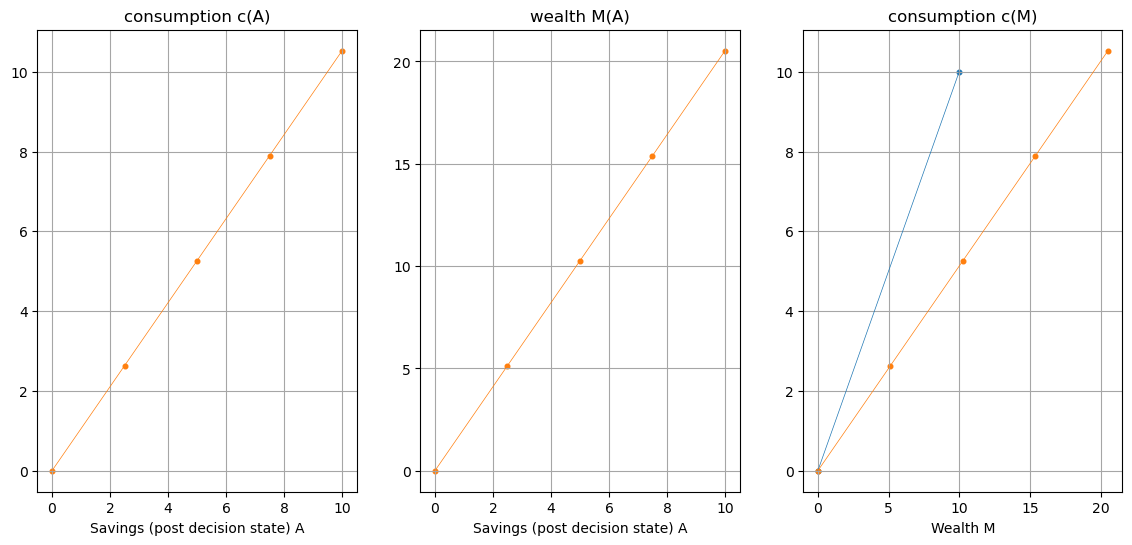

In [13]:
# Iteration 1
policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M1 = np.full(ngrid,np.nan)
c1 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c1[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M1[j] = aj + c1[j]             # endogenous wealth
plot_iter(A,M1,c1)             # returns fig object, plotted automatically

### Do iteation iteration 2

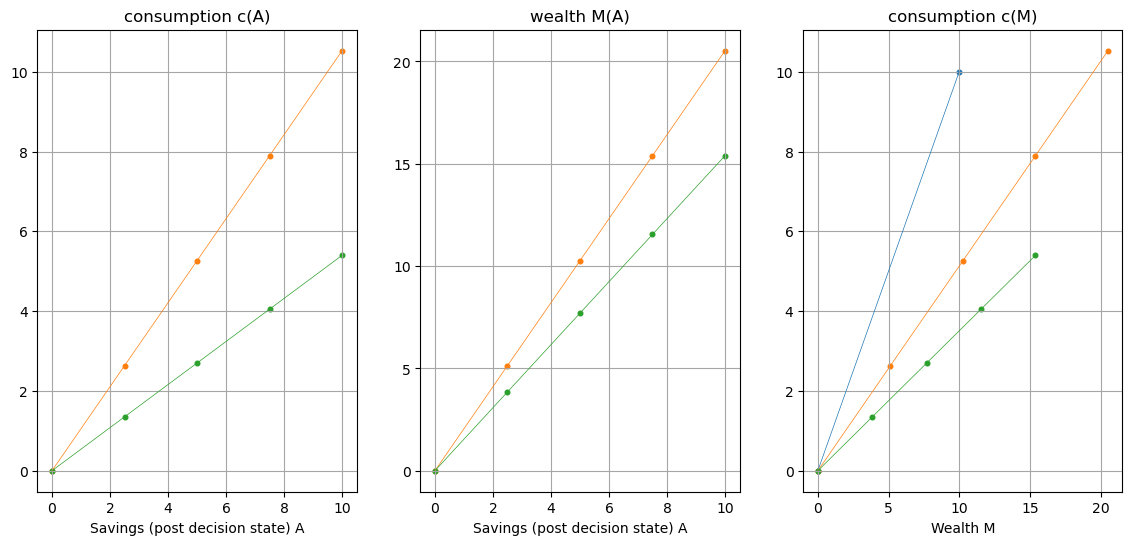

In [14]:
# Iteration 2
policy = interpolate.interp1d(M1,c1,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
M2 = np.full(ngrid,np.nan)
c2 = np.full(ngrid,np.nan)
for j,aj in enumerate(A):
    Mpr = max(R*aj+y,1e-10)        # next period wealth
    cpr = policy(Mpr)              # next period consumption
    c2[j] = imu( beta*R*mu(cpr) )  # inverse Euler
    M2[j] = aj + c2[j]             # endogenous wealth
plot_iter(A,M2,c2)             # returns fig object, plotted automatically

### Corner solutions in EGM

- So far only covered the interior solutions where the Euler equation holds  
- What about the restriction $ 0 \le c \le M $ which is equivalent to $ 0 \le A \le M $?  


1. By choosing the grid on $ A $ to respect the constraint $ 0 \le A \le M $ EGM only implements interior solutions  
1. Corner solutions must be added with an additional provisions in the code  

#### Lower bound on consumption

- $ c \ge 0 $ is never binding if utility function satisfies  


$$
\lim_{c \rightarrow 0} u(c) = -\infty
$$

- all our usual utility functions like $ \log(c) $ or CRRA utility $ \frac{c^\lambda - 1}{\lambda} $ satisfy this condition  

#### Upper bound on consumption

- If $ c \le M $ is binding, then $ A=0 $, can be computed directly  


**Proposition** If utility function $ u(c) $ in the consumption-savings model is monotone and concave, then end-of-period wealth $ A=M-c $ is non-decreasing in M.

- Let $ M_0 = (u')^{-1} \Big( \beta R \mathbb{E}_{y} u'(c(\tilde{y})\big) \Big) $ denote the point that corresponds to $ A=0 $  
- Due to the proposition, for all $ M<M_0 $ the end of period wealth must be zero, and thus optimal consumption $ c=M $ is the corner solution  
- To implement this in the code, we just need to add a 45 degrees segment to the consumption function below $ M_0 $  

### Clear memory and set up plotting tool again

In [15]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

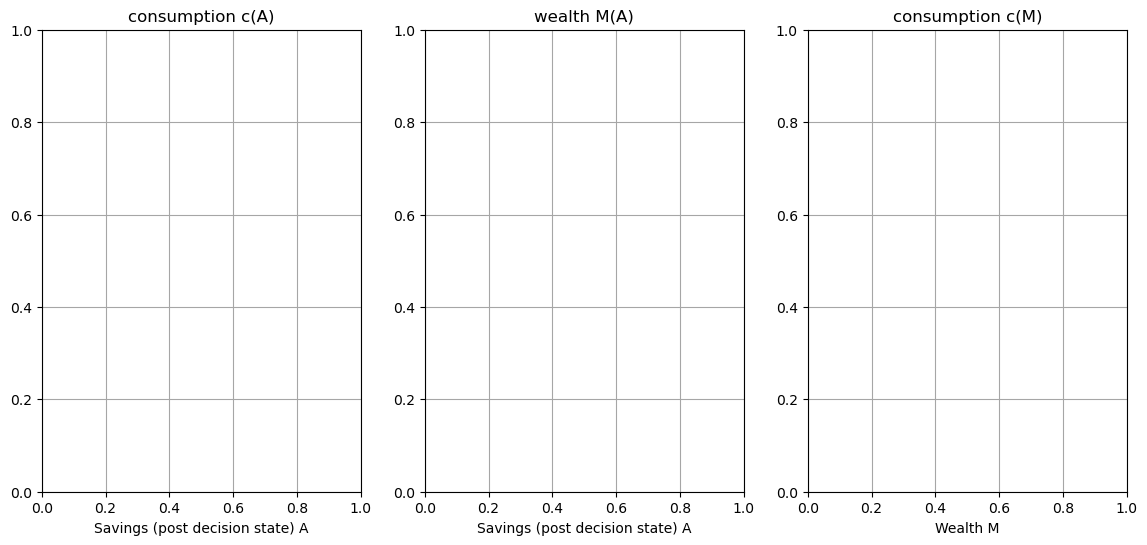

In [16]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Set up grids and parameters and plot

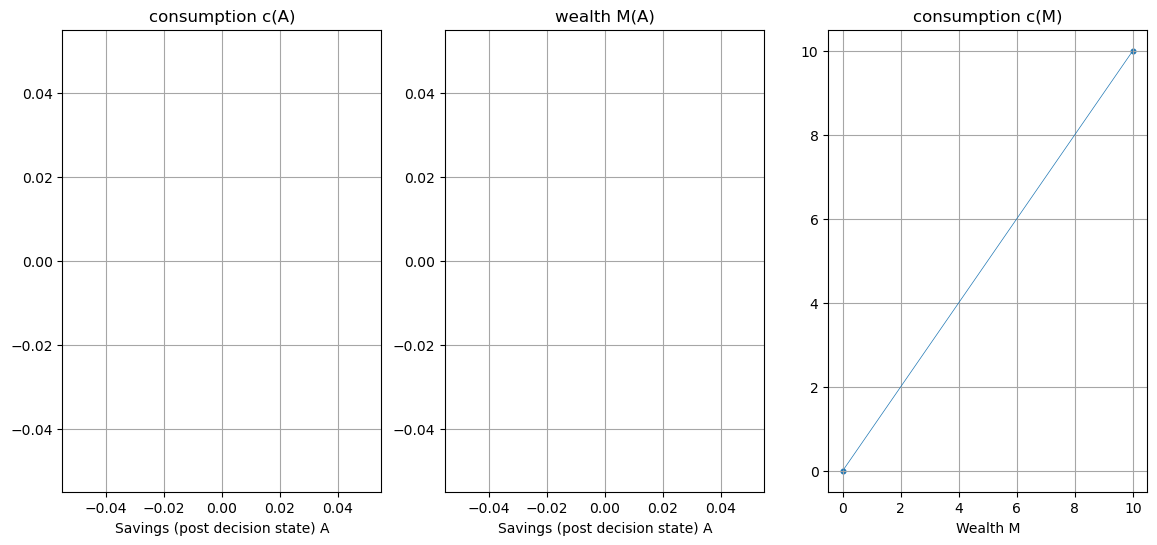

In [17]:
beta,R,y = 0.95,1.05,1   # fundamentals
Mbar,ngrid = 10,5        # technical parameters
u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# Iteration 0
plot_iter(np.full(2,np.nan),M0,c0)


### Set up iterartion function - where we add one point at the origin

In [18]:
# Iteration function
Aex = np.full(ngrid+1,np.nan)
Aex[1:] = A
def iter(M0,c0):
    policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
    M1 = np.full(ngrid+1,np.nan)
    c1 = np.full(ngrid+1,np.nan)
    M1[0] = c1[0] = 0              # REMARK: add one point at the origin!!!
    for j,aj in enumerate(A):
        Mpr = max(R*aj+y,1e-10)    # next period wealth
        cpr = policy(Mpr)          # next period consumption
        c = imu( beta*R*mu(cpr) )  # inverse Euler
        M = aj + c                 # endogenous wealth
        M1[j+1] = M                # save to array
        c1[j+1] = c
    pt = plot_iter(Aex,M1,c1)        # returns fig object, plotted automatically
    return M1,c1,pt

### Do an iteration

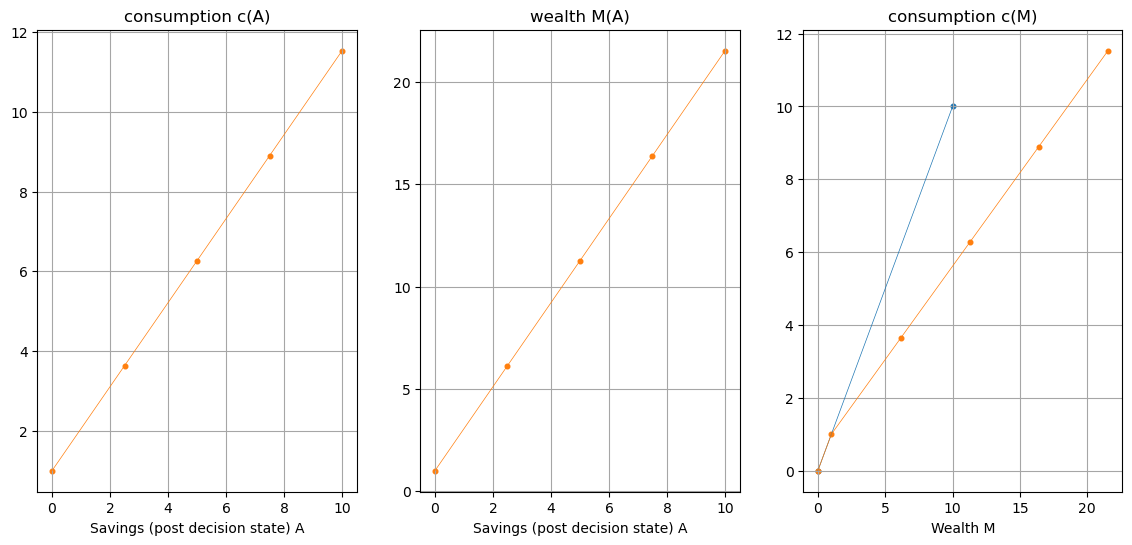

In [19]:
M1,c1,pt = iter(M0,c0)
pt

### Do another iteration

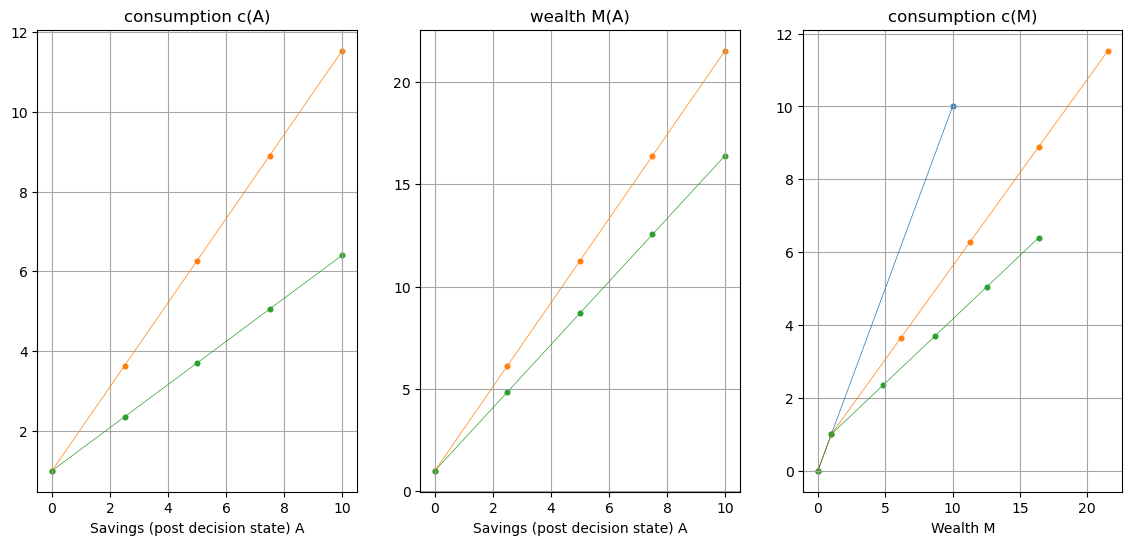

In [20]:
M,c,pt = iter(M1,c1)
pt

### Do more iterations 

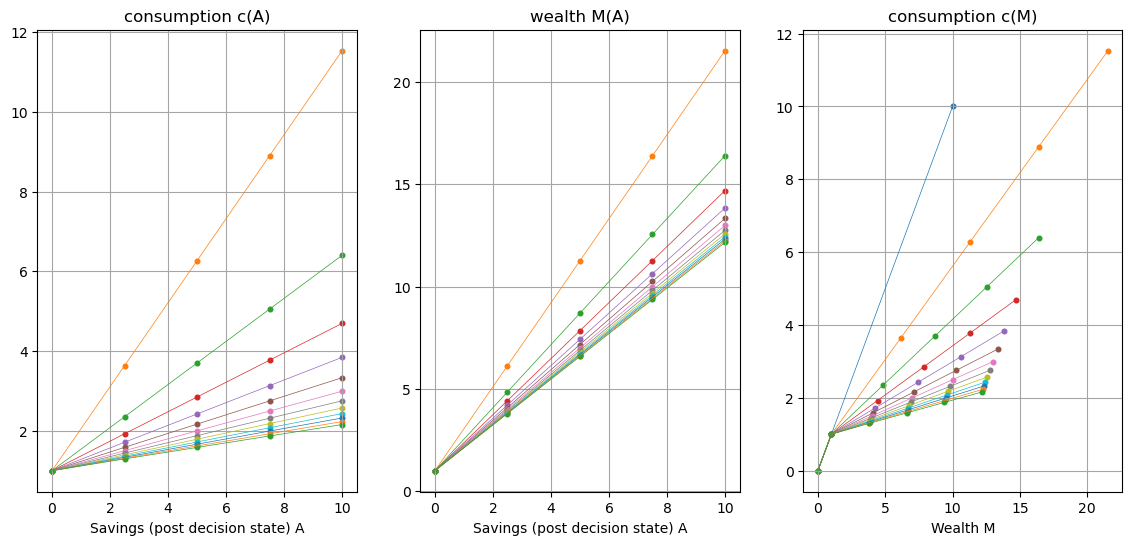

In [21]:
for i in range(10):
    M,c,pt = iter(M,c)
pt

### Prepare for DEATON: Clear memory and set up plotting tool again

In [22]:
%clear  # clear notebook memory
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

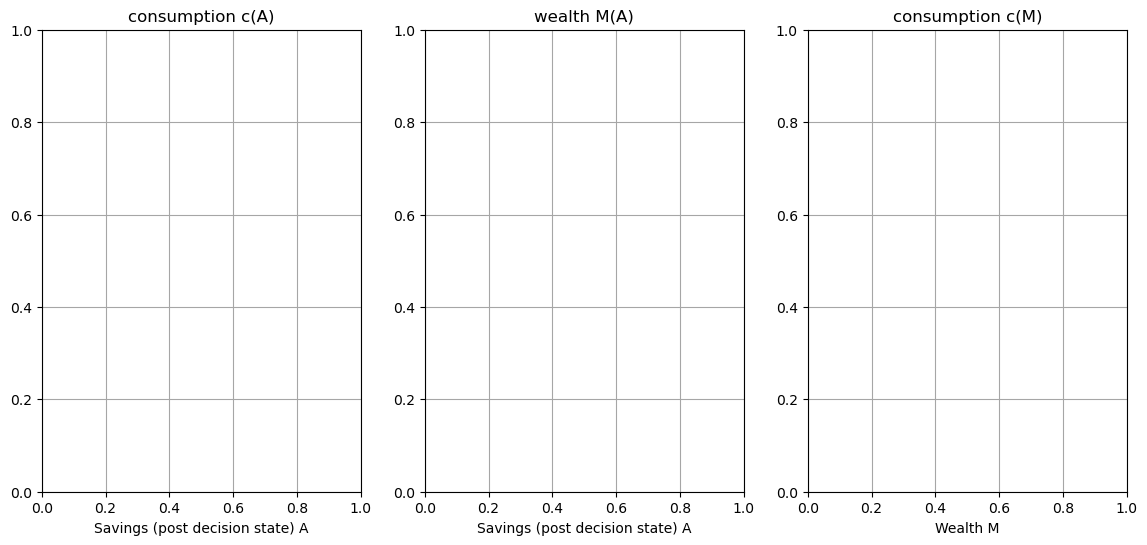

In [23]:
# set up plotting
fig, ax = plt.subplots(1,3,figsize=(14,6))
for axi in ax:
    axi.grid(which='both', color='0.65', linestyle='-')
ax[0].set_title('consumption c(A)')
ax[1].set_title('wealth M(A)')
ax[2].set_title('consumption c(M)')
ax[0].set_xlabel('Savings (post decision state) A')
ax[1].set_xlabel('Savings (post decision state) A')
ax[2].set_xlabel('Wealth M')
# make colors generator
# https://stackoverflow.com/questions/37890412/increment-matplotlib-color-cycle
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
def plot_iter(a,m,c):
    color = next(colors)
    ax[0].plot(a,c,linewidth=0.5,c=color)
    ax[1].plot(a,m,linewidth=0.5,c=color)
    ax[2].plot(m,c,linewidth=0.5,c=color)
    ax[0].scatter(a,c,s=11,c=color)
    ax[1].scatter(a,m,s=11,c=color)
    ax[2].scatter(m,c,s=11,c=color)
    return fig

### Back to Deaton

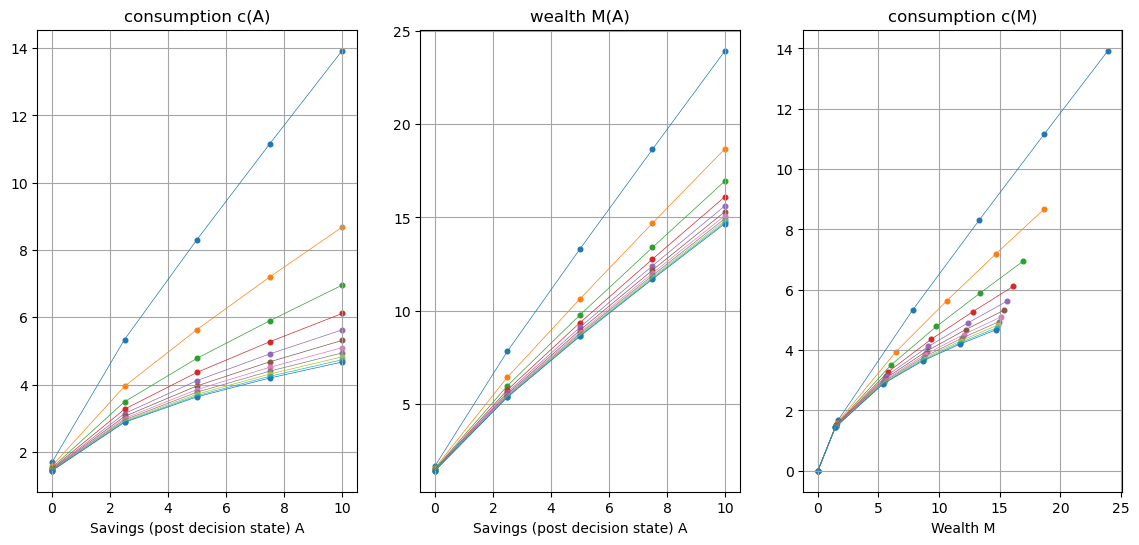

In [24]:
beta,R = 0.95,1.05   # fundamentals
Mbar,ngrid = 10,5        # technical parameters
μ=1
σ=1
n_y=10;

u = lambda c: np.log(c)  # utility function
mu = lambda c: 1/c       # marginal utility function
imu = lambda u: 1/u      # inverse marginal utility function

A = np.linspace(0,Mbar,ngrid)  # What are the bounds of A?
c0 = np.array([0,Mbar])
M0 = np.array([0,Mbar])

# quadrture grids for y (adjusted weights and nodes)
q, w = np.polynomial.legendre.leggauss(n_y) # legendre quadrture nodes and weights on [-1,1]
Ginv = lambda z:  np.exp(scipy.stats.norm.ppf(z, loc=μ, scale =σ))  # inverse cdf of log-normal
weights=w/2; # change of varibale to adjust to [0,1] interval
y = Ginv((q+1)/2) # use change of variable to adjust nodes to [0,1] interval and use Ginv to obntain y


# Iteration function
Aex = np.full(ngrid+1,np.nan)
Aex[1:] = A
def deaton_iter(M0,c0):
    policy = interpolate.interp1d(M0,c0,kind='slinear',fill_value="extrapolate")  # interpolation function for policy
    M1 = np.full(ngrid+1,np.nan)
    c1 = np.full(ngrid+1,np.nan)

    M1[0] = c1[0] = 0              # REMARK: add one point at the origin!!!

    for j,aj in enumerate(A):
        Mpr = np.maximum(R*aj+y,1e-10)    # next period wealth
        cnext = policy(Mpr)          # next period consumption
        Emu1 = beta*R*np.sum(weights*mu(cnext)) # expected marginal utility next period consumption
        c = imu(Emu1)  # inverse Euler
        M = aj + c                 # endogenous wealth
        M1[j+1] = M                # save to array
        c1[j+1] = c
    pt = plot_iter(Aex,M1,c1)        # returns fig object, plotted automatically
    return M1,c1,pt


M,c,pt = deaton_iter(M0,c0)

for i in range(10):
    M,c,pt = deaton_iter(M,c)
pt



### Class of models solvable by EGM

- finite and infinite horizon dynamic models with continuous choice  
- strictly concave monotone and differentiable utility function (with analytic inverse marginal)  
- one continuous state variable (wealth) and one continuous choice variable (consumption)  
- particular structure of the law of motion for state variables (intertemporal budget constraint)  
- occasionally binding borrowing constraints  
- can also easily allow additional quasi-exogenous state variables (with motion rules dependent on $ A $ and not $ M $ or $ c $)  


Rather small class, although many important models in micro and macro economics are included

### Generalizations of EGM

Multiple dimensions: hard because irregular grids in multiple dimensions

- 📖 Barillas & Fernandez-Villaverde, JEDC 2007 “A Generalization of the Endogenous Grid Method”  
- 📖 Ludwig & Schön, Computational Economics, 2018 “Endogenous Grids in Higher Dimensions: Delaunay Interpolation and Hybrid Methods”  
- 📖 Matthew White, JEDC 2015 “The Method of Endogenous Gridpoints in Theory and Practice”  
- 📖 Iskhakov, Econ Letters 2015 “Multidimensional endogenous gridpoint method: solving triangular dynamic stochastic optimization problems without root-finding operations” + Corrigendum  

### Generalizations of EGM

Non-convex problems: hard because Euler equation is not a sufficient condition any longer

- 📖 Giulio Fella, RED 2014 “A Generalized Endogenous Grid Method for Non-Smooth and Non-Concave Problems”  
- 📖 Iskhakov, Jørgensen, Rust, Schjerning, QE 2017 “The Endogenous Grid Method for Discrete-Continuous Dynamic Choice Models with (or without) Taste Shocks”  
- 📖 Jeppe Druedahl, Thomas Jørgensen, JEDC 2017 “A General Endogenous Grid Method for Multi-Dimensional Models with Non-Convexities and Constraints”  

### Further learning resources

- 📖 Chris Carroll (2006) Original article on EGM
  [http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf](http://pages.stern.nyu.edu/~dbackus/Computation/Carroll%20endog%20grid%20EL%2006.pdf)  
- Literature cited above  
- 📖 >500 citations of Carroll’s paper
  [https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en](https://scholar.google.com/scholar?cites=20745560105937946&as_sdt=2005&sciodt=0,5&hl=en)  